# Function fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import expon

%matplotlib inline

## Exponential functions

In [41]:
def fexp2p(x, a, b):
    return a * np.exp(b * x)

def fexp3p(x, a, b, c):
    return a * np.exp(b * x) + c

def fexp4p(x, a, b, c, d):
    return a * np.exp(b * (x - c)) + d

def goodness_of_fit(f, x, y, popt, pcov=None):
    print('parameters: ', popt)
    if pcov is not None:
        print('covariance: ', pcov)
        perr = np.sqrt(np.diag(pcov))
        print(perr, '\n')

    # residual sum of squares (ss_res)
    residuals = y - f(x, *popt)
    ss_res = np.sum(residuals**2)
    # total sum of squares (ss_tot)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('R**2 = ', r_squared) 
    return r_squared

### Data set 1: similar fit using 2 and 4 parameter exponential func 

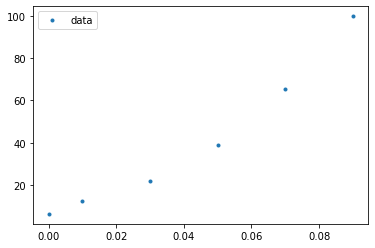

In [42]:
# data
x = np.array([0, 0.01, 0.03, 0.05, 0.07, 0.09])
y = np.array([6.41, 12.6, 22.1, 39.05, 65.32, 99.78])
plt.plot(x, y, '.', label='data')
plt.legend()

#### function fexp2p

In [43]:
f = fexp2p
popt, pcov = curve_fit(f, x, y)
rsq = goodness_of_fit(f, x, y, popt, pcov)

parameters:  [10.8024374  24.91266597]
covariance:  [[ 1.3387491  -1.49666515]
 [-1.49666515  1.76665619]]
[1.15704326 1.3291562 ] 

R**2 =  0.9937916228245799


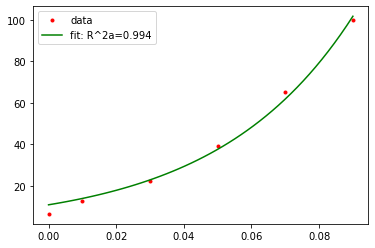

In [44]:
x2 = np.linspace(0, 0.09, 50)

plt.plot(x, y, 'r.', label='data')
plt.plot(x2, f(x2, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()

#### function fexp3p

In [46]:
f = fexp3p
popt, pcov = curve_fit(f, x, y)
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [ 21.01849705  18.80192194 -14.06962158]
R**2 =  0.9993463249237973


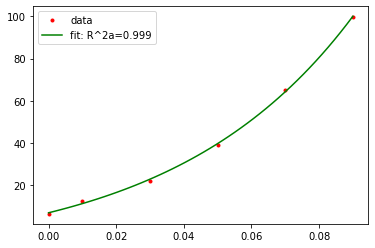

In [47]:
plt.plot(x, y, 'r.', label='data')
plt.plot(x2, f(x2, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()

### Data set 2: similar fit too

#### funcion fexp2p

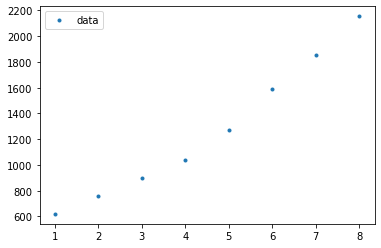

In [48]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([620.00, 761.88, 899.80, 1039.93, 1270.63, 1589.04, 1851.31, 2154.92])
plt.plot(x, y, '.', label='data')
plt.legend()

xplot = np.linspace(np.min(x), np.max(x), 50)

In [49]:
f = fexp2p
popt, pcov = curve_fit(f, x, y)
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [5.28248086e+02 1.77561566e-01]
R**2 =  0.9970700842802313


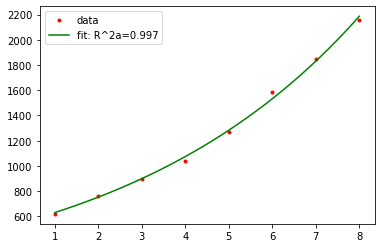

In [50]:
plt.plot(x, y, 'r.', label='data')

plt.plot(xplot, f(xplot, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()

#### function fexp3p

In [51]:
f = fexp3p
popt, pcov = curve_fit(f, x, y) 
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [ 6.49002753e+02  1.59337710e-01 -1.46271270e+02]
R**2 =  0.9973966239112718


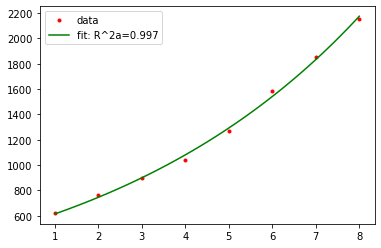

In [52]:
plt.plot(x, y, 'r.', label='data')
plt.plot(xplot, f(xplot, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()

### Data set 3, same as data set 2 with y flipped 

#### fexp3p: I need to do an initial stimation of parameters to converge

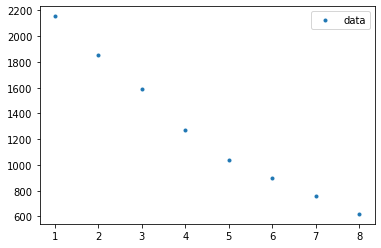

In [56]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([620.00, 761.88, 899.80, 1039.93, 1270.63, 1589.04, 1851.31, 2154.92])
y = np.flip(y)
xplot = np.linspace(np.min(x), np.max(x), 50)

plt.plot(x, y, '.', label='data')
plt.legend()

In [57]:
f = fexp2p
popt, pcov = curve_fit(f, x, y) 
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [ 2.61134354e+03 -1.77561567e-01]
R**2 =  0.9970700842802313


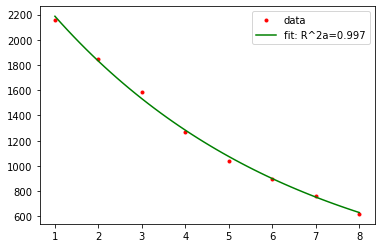

In [58]:
plt.plot(x, y, 'r.', label='data')
plt.plot(xplot, f(xplot, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()

In [59]:
f = fexp3p
popt, pcov = curve_fit(f, x, y, p0=[2600, -0.01, 0.01]) 
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [ 2.72296448e+03 -1.59337666e-01 -1.46271644e+02]
R**2 =  0.9973966239112705


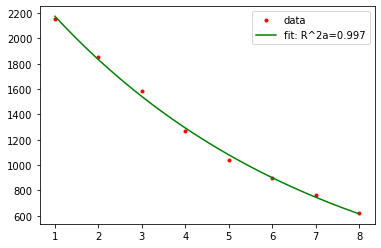

In [61]:
plt.plot(x, y, 'r.', label='data')
plt.plot(xplot, f(xplot, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()

## Logarithmic function

In [115]:
def fln2p(x, a, b):
    return a + b*np.log(x)

def fln3p(x, a, b, c):
    return a + b*np.log(x-c)

def fpolyg4(x, a1, a2, a3, a4, a5):
    return a1*np.power(x, 2) + \
    a1*np.power(x, 4) + \
    a2*np.power(x, 3) + \
    a3*np.power(x, 2) + \
    a4 * x + a5

### Data set 1

In [67]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = np.array([47.3, 50.0, 54.1, 59.7, 62.9, 68.2, 69.7, 70.8, 73.7, 75.4, 76.8, 78.7])

xplot = np.linspace(np.min(x), np.max(x), 50)

In [70]:
f = fln2p
popt, pcov = curve_fit(f, x, y) 
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [42.52722584 13.85752327]
R**2 =  0.9562944075470111


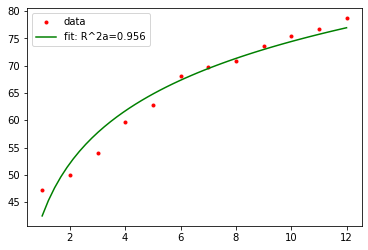

In [72]:
plt.plot(x, y, 'r.', label='data')
plt.plot(xplot, f(xplot, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()
plt.show()

### Data set 2

In [74]:
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
y = np.array([142, 149, 154, 155, 159, 161, 163, 164, 164, 166, 167])

xplot = np.linspace(np.min(x), np.max(x), 50)

In [75]:
f = fln2p
popt, pcov = curve_fit(f, x, y) 
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [141.9124295   10.45366572]
R**2 =  0.9934156028481129


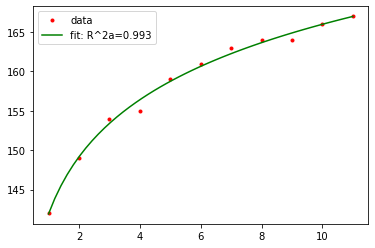

In [76]:
plt.plot(x, y, 'r.', label='data')
plt.plot(xplot, f(xplot, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()

In [77]:
y = np.flip(y)

In [78]:
f = fln2p
popt, pcov = curve_fit(f, x, y) 
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [172.25608892  -8.61697666]
R**2 =  0.6749997242761308


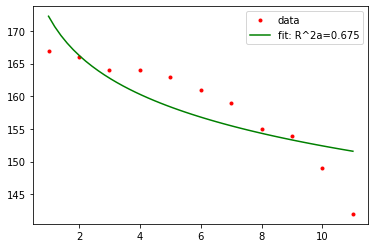

In [79]:
plt.plot(x, y, 'r.', label='data')
plt.plot(xplot, f(xplot, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()

## Logistic function

In [128]:
def flogistic3p(x, a, b, c):
    return c / (1. + a*np.exp(-b*x))

### Data Set 1

In [123]:
fname = r'C:\Users\solis\Documents\DEV\jup\_data\americans_phone_service.csv'

y = np.genfromtxt(fname, delimiter=',', dtype=np.float64, autostrip=True, skip_header=1, usecols=[1,])

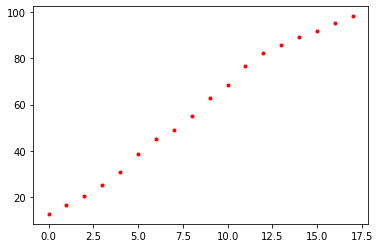

In [136]:
x = np.arange(len(y))
plt.plot(x, y, 'r.', label='data')

In [141]:
f = flogistic3p
popt, pcov = curve_fit(f, x, y, p0=[7, 0.25, 105]) 
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [  6.88330003   0.25954714 105.73736367]
R**2 =  0.9987785725692748


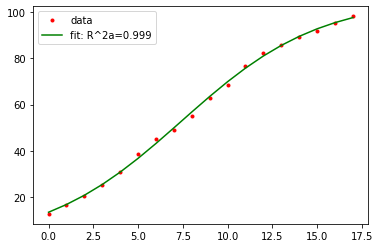

In [138]:
plt.plot(x, y, 'r.', label='data')
plt.plot(x, f(x, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()

### Data set 2

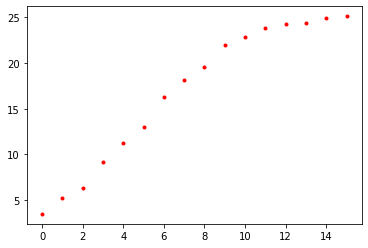

In [143]:
fname = r'C:\Users\solis\Documents\DEV\jup\_data\sale_service.csv'

y = np.genfromtxt(fname, delimiter=',', dtype=np.float64, autostrip=True, skip_header=1, usecols=[1,])
x = np.arange(len(y))
plt.plot(x, y, 'r.', label='data')

In [144]:
f = flogistic3p
popt, pcov = curve_fit(f, x, y, p0=[2, 0.5, 25]) 
rsq = goodness_of_fit(f, x, y, popt)

parameters:  [ 6.11368657  0.38521492 25.65665939]
R**2 =  0.9983958146623312


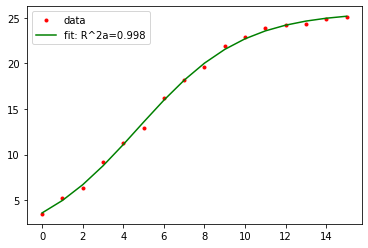

In [145]:
plt.plot(x, y, 'r.', label='data')
plt.plot(x, f(x, *popt), 'g-', label='fit: R^2a=%5.3f' % rsq)
plt.legend()